In [10]:
import tensorflow as tf


In [11]:
# checking if the gpu is connected or not
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4988361347439068409
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4840685568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11583274402125560127
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [12]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error-- which we will be calling in the later part of the code.
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# Model -1 

## Using Two Convolutional Layer.

### Architecture is like :-

#### Input Image --> (Convolutional Layer) --> (Convolutional Layer) --> Max Pooling --> Dropout ---> Flatten --> Fully Connected Dense Neural Network ---> Dropout ---> Fully Connected Dense Neural Network ---> Output.

In [38]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.2688 - acc: 0.9162 - val_loss: 0.0665 - val_acc: 0.9800
Epoch 2/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0914 - acc: 0.9729 - val_loss: 0.0406 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0678 - acc: 0.9795 - val_loss: 0.0358 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0303 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0489 - acc: 0.9851 - val_loss: 0.0283 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0426 - acc: 0.9871 - val_loss: 0.0286 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================]

## Let us see how the loss reduces with every epoch gradually in a graphical manner.

Test score: 0.02731494907946035
Test accuracy: 0.9915


<IPython.core.display.Javascript object>


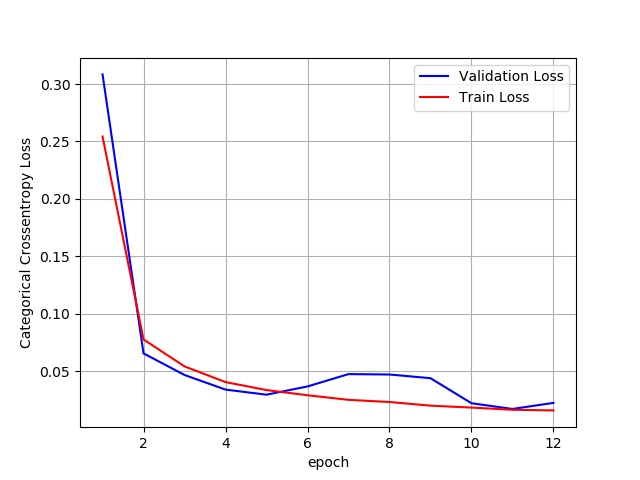

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model - 2

## Using Three Convolutional Layer Along with different Drop Out rates.

In [16]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 92us/step - loss: 0.2235 - acc: 0.9302 - val_loss: 0.0460 - val_acc: 0.9855
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0549 - acc: 0.9832 - val_loss: 0.0351 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0232 - val_acc: 0.9919
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0295 - acc: 0.9910 - val_loss: 0.0292 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0253 - acc: 0.9924 - val_loss: 0.0208 - val_acc: 0.9928
Epoch 6/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0220 - acc: 0.9930 - val_loss: 0.0204 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================]

## Let us see how the loss reduces with every epoch gradually in a graphical manner.

Test score: 0.01844312870558474
Test accuracy: 0.9938


<IPython.core.display.Javascript object>


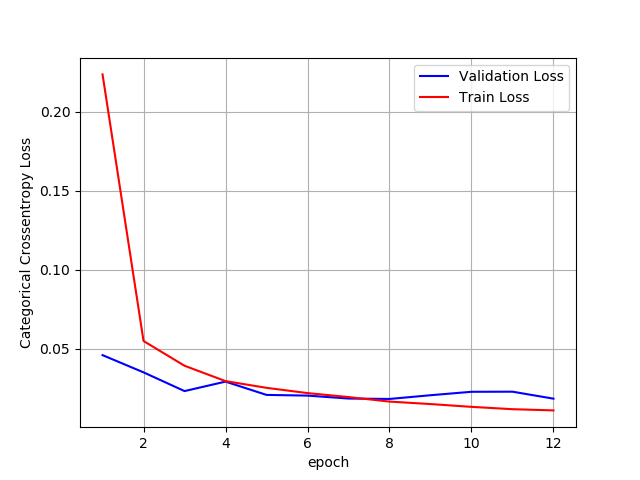

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model - 3

### Using 5 Convolutional layers along with Batch Normalization and different drop out rates and max pooling

In [19]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [40]:
batch_size = 256
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# refer --> https://www.quora.com/Are-maxpooling-layer-kernel-sizes-in-CNNs-generally-smaller-than-convolutional-layer-kernel-sizes-Why

model = Sequential()

model.add(Conv2D(64, kernel_size=(9,9),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.33))

model.add(Conv2D(128, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.50))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.40))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.33))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 237us/step - loss: 0.2299 - acc: 0.9298 - val_loss: 0.5386 - val_acc: 0.8796
Epoch 2/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0777 - acc: 0.9761 - val_loss: 0.0716 - val_acc: 0.9787
Epoch 3/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0772 - val_acc: 0.9753
Epoch 4/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0385 - acc: 0.9883 - val_loss: 0.0819 - val_acc: 0.9747
Epoch 5/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0317 - acc: 0.9898 - val_loss: 0.0635 - val_acc: 0.9813
Epoch 6/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0598 - val_acc: 0.9827
Epoch 7/12
60000/60000 [===================

## Let us see how the loss reduces with every epoch gradually in a graphical manner.

Test score: 0.02214070949236484
Test accuracy: 0.9934


<IPython.core.display.Javascript object>


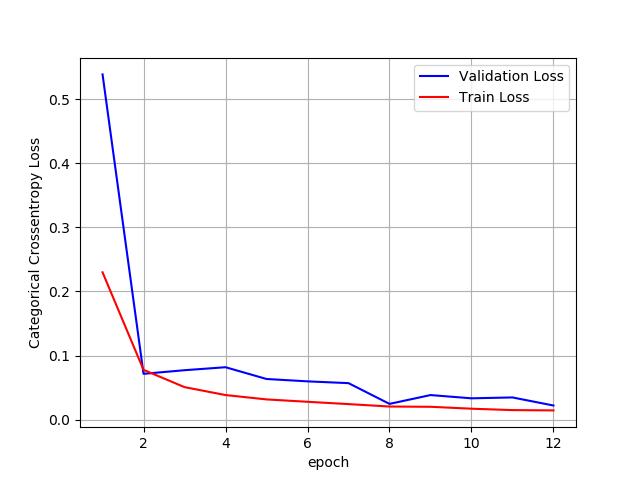

In [41]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model-4

### Using 7 Convolutional layers along with Batch Normalization and different drop out rates and max pooling

In [43]:
batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# refer --> https://www.quora.com/Are-maxpooling-layer-kernel-sizes-in-CNNs-generally-smaller-than-convolutional-layer-kernel-sizes-Why

model = Sequential()

model.add(Conv2D(64, kernel_size=(13,13),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.33))

model.add(Conv2D(128, (6,6), activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.50))

model.add(Conv2D(256, (3,3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Conv2D(128, (2,2), activation='sigmoid'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3,3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.40))

model.add(Conv2D(64, (2,2), activation='sigmoid'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Conv2D(64, (1,1), activation='sigmoid'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.33))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.2917 - acc: 0.9137 - val_loss: 0.3288 - val_acc: 0.9132
Epoch 2/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.1124 - acc: 0.9681 - val_loss: 0.0691 - val_acc: 0.9796
Epoch 3/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.0808 - acc: 0.9781 - val_loss: 0.0749 - val_acc: 0.9802
Epoch 4/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.0631 - acc: 0.9824 - val_loss: 0.0803 - val_acc: 0.9785
Epoch 5/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.0524 - acc: 0.9852 - val_loss: 0.0547 - val_acc: 0.9851
Epoch 6/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.0490 - acc: 0.9862 - val_loss: 0.0423 - val_acc: 0.9878
Epoch 7/15
60000/60000 [===================

## Let us see how the loss reduces with every epoch gradually in a graphical manner.

Test score: 0.03710640785486321
Test accuracy: 0.9915


<IPython.core.display.Javascript object>


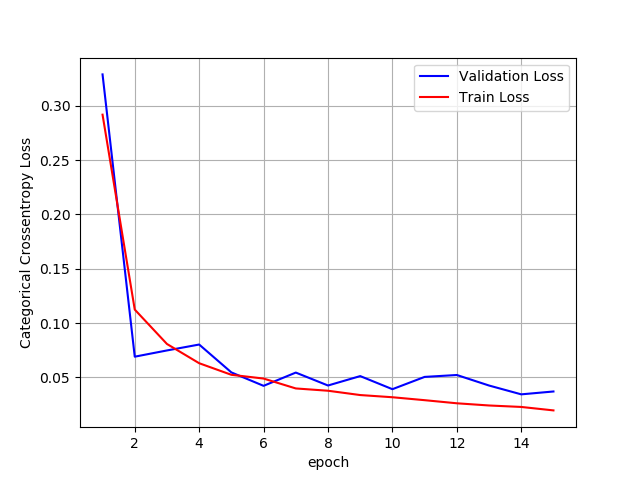

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [46]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Number of convolutional layers","Activation","epochs"," accuracy"]
x.add_row([2,"RELU",12,0.9915])
x.add_row([3,"RELU",12,0.9938])
x.add_row([5,"RELU",12,0.9934])
x.add_row([7,"sigmoid",15,0.9915])

print(x)

+--------------------------------+------------+--------+-----------+
| Number of convolutional layers | Activation | epochs |  accuracy |
+--------------------------------+------------+--------+-----------+
|               2                |    RELU    |   12   |   0.9915  |
|               3                |    RELU    |   12   |   0.9938  |
|               5                |    RELU    |   12   |   0.9934  |
|               7                |  sigmoid   |   15   |   0.9915  |
+--------------------------------+------------+--------+-----------+


# Summary :-

### We can see in case of image data what we generally us is the convolutional neural network and in case of convolutional networks which we tried with various architectures we can directly observe that they bring very high accuracy in the initial epochs values only hence it clearly shows the power of convolutional networks.We tried with different number of convolutional networks in our architectures with difeerent different drop out rates,kernel sizes and max pooling variations and we can see the best result which we will get will depend from data to data and the results which we received are very close to each other along with high accuracy.We can also see in the graph of number of loss vs number of epochs and we can say from the graph that the loss converges very quickly in case of convolutional neural networks.